In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangle as w
#import explore as exp
#import model as mo


warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
aac_intake = pd.read_csv('Austin_Animal_Center_Intakes.csv')

In [3]:
aac_intake.head(2)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


In [4]:
aac_outcome = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [5]:
aac_outcome.head(2)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown


In [8]:
# merge two csvs
aac = pd.merge(aac_intake, aac_outcome, how='left')
aac.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,NaN,NaN,NaN,NaN,NaN
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,NaN,NaN,NaN,NaN,NaN
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,NaN,NaN,NaN,NaN,NaN
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,NaN,NaN,NaN,NaN
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,NaN,NaN,NaN,NaN,NaN


In [9]:
aac.head(2).T

,0,1
Animal ID,A786884,A706918
Name,*Brock,Belle
DateTime,01/03/2019 04:19:00 PM,07/05/2015 12:59:00 PM
MonthYear,01/03/2019 04:19:00 PM,07/05/2015 12:59:00 PM
Found Location,2501 Magin Meadow Dr in Austin (TX),9409 Bluegrass Dr in Austin (TX)
Intake Type,Stray,Stray
Intake Condition,Normal,Normal
Animal Type,Dog,Dog
Sex upon Intake,Neutered Male,Spayed Female
Age upon Intake,2 years,8 years


In [10]:
aac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124120 entries, 0 to 124119
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
 12  Date of Birth     5 non-null       object
 13  Outcome Type      5 non-null       object
 14  Outcome Subtype   4 non-null       object
 15  Sex upon Outcome  5 non-null       object
 16  Age upon Outcome  5 non-null       obj

In [11]:
aac.isnull().sum()

Animal ID                0
Name                 39051
DateTime                 0
MonthYear                0
Found Location           0
Intake Type              0
Intake Condition         0
Animal Type              0
Sex upon Intake          1
Age upon Intake          0
Breed                    0
Color                    0
Date of Birth       124115
Outcome Type        124115
Outcome Subtype     124116
Sex upon Outcome    124115
Age upon Outcome    124115
dtype: int64

In [14]:
aac.rename(columns={"Name": "name", "Animal ID": "animal_id", "Found Location": "found_loc", "Intake Type": "intake_type", "Intake Condition": "intake_cond", "Animal Type": "animal_type", "Sex upon Intake": "intake_sex", "Age upon Intake": "intake_age", "Breed": "breed", "Color": "color", "Date of Birth": "dob", "Outcome Type": "outcome_type", "Outcome Subtype": "outcome_subtype", "Sex upon Outcome": "outcome_sex", "Age upon Outcome": "outcome_age"})

,animal_id,name,DateTime,MonthYear,found_loc,intake_type,intake_cond,animal_type,intake_sex,intake_age,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,NaN,NaN,NaN,NaN,NaN
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,NaN,NaN,NaN,NaN,NaN
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,NaN,NaN,NaN,NaN,NaN
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,NaN,NaN,NaN,NaN
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan,NaN,NaN,NaN,NaN,NaN
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White,NaN,NaN,NaN,NaN,NaN
124117,A830180,Gigi,03/03/2021 04:31:00 PM,03/03/2021 04:31:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White,NaN,NaN,NaN,NaN,NaN
124118,A830171,NaN,03/03/2021 05:13:00 PM,03/03/2021 05:13:00 PM,1310 West Howard Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Plott Hound Mix,Brown Brindle/White,NaN,NaN,NaN,NaN,NaN


In [ ]:
aac[aac['unitcnt'].isnull()]

In [16]:
aac_outcome.isnull().sum()

Animal ID               0
Name                39025
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           20
Outcome Subtype     67183
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

In [17]:
aac_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [38]:
# merge two csvs
inner = pd.merge(aac_intake, aac_outcome, how='inner')

In [39]:
inner

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A722993,Sleepy,06/18/2016 11:23:00 AM,06/18/2016 11:23:00 AM,Leander (TX),Stray,Normal,Dog,Neutered Male,3 months,Plott Hound/Labrador Retriever,Black Brindle/White,02/27/2016,Adoption,Foster,Neutered Male,3 months
1,A746505,Toby,04/25/2017 03:57:00 PM,04/25/2017 03:57:00 PM,7404 Langston Dr in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Chihuahua Shorthair Mix,Tan/White,06/04/2016,Return to Owner,NaN,Intact Male,10 months
2,A725607,*Jimmy,06/21/2016 06:13:00 PM,06/21/2016 06:13:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Brown Tabby/White,03/19/2016,Adoption,Foster,Neutered Male,3 months
3,A749461,*Lars,05/18/2017 03:04:00 PM,05/18/2017 03:04:00 PM,Augusta Bend in Travis (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Orange Tabby,05/15/2014,Transfer,Snr,Spayed Female,3 years
4,A792353,NaN,04/09/2019 03:58:00 PM,04/09/2019 03:58:00 PM,3001 S Fm 973 in Austin (TX),Stray,Sick,Cat,Unknown,2 years,Domestic Shorthair Mix,Orange Tabby,04/09/2017,Died,Enroute,Unknown,2 years


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         5 non-null      object
 1   Name              4 non-null      object
 2   DateTime          5 non-null      object
 3   MonthYear         5 non-null      object
 4   Found Location    5 non-null      object
 5   Intake Type       5 non-null      object
 6   Intake Condition  5 non-null      object
 7   Animal Type       5 non-null      object
 8   Sex upon Intake   5 non-null      object
 9   Age upon Intake   5 non-null      object
 10  Breed             5 non-null      object
 11  Color             5 non-null      object
 12  Date of Birth     5 non-null      object
 13  Outcome Type      5 non-null      object
 14  Outcome Subtype   4 non-null      object
 15  Sex upon Outcome  5 non-null      object
 16  Age upon Outcome  5 non-null      object
dtypes: object(17)
memory

In [25]:
df = df.rename(columns={"Name": "name", "DateTime": "datetime", "MonthYear": "monthyear", "Animal ID": "animal_id", "Found Location": "found_loc", "Intake Type": "intake_type", "Intake Condition": "intake_cond", "Animal Type": "animal_type", "Sex upon Intake": "intake_sex", "Age upon Intake": "intake_age", "Breed": "breed", "Color": "color", "Date of Birth": "dob", "Outcome Type": "outcome_type", "Outcome Subtype": "outcome_subtype", "Sex upon Outcome": "outcome_sex", "Age upon Outcome": "outcome_age"})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   animal_id        5 non-null      object
 1   name             4 non-null      object
 2   datetime         5 non-null      object
 3   monthyear        5 non-null      object
 4   found_loc        5 non-null      object
 5   intake_type      5 non-null      object
 6   intake_cond      5 non-null      object
 7   animal_type      5 non-null      object
 8   intake_sex       5 non-null      object
 9   intake_age       5 non-null      object
 10  breed            5 non-null      object
 11  color            5 non-null      object
 12  dob              5 non-null      object
 13  outcome_type     5 non-null      object
 14  outcome_subtype  4 non-null      object
 15  outcome_sex      5 non-null      object
 16  outcome_age      5 non-null      object
dtypes: object(17)
memory usage: 720.0+ byte

In [28]:
df[df['outcome_type'].isnull()]

,animal_id,name,datetime,monthyear,found_loc,intake_type,intake_cond,animal_type,intake_sex,intake_age,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age


In [29]:
df

,animal_id,name,datetime,monthyear,found_loc,intake_type,intake_cond,animal_type,intake_sex,intake_age,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A722993,Sleepy,06/18/2016 11:23:00 AM,06/18/2016 11:23:00 AM,Leander (TX),Stray,Normal,Dog,Neutered Male,3 months,Plott Hound/Labrador Retriever,Black Brindle/White,02/27/2016,Adoption,Foster,Neutered Male,3 months
1,A746505,Toby,04/25/2017 03:57:00 PM,04/25/2017 03:57:00 PM,7404 Langston Dr in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Chihuahua Shorthair Mix,Tan/White,06/04/2016,Return to Owner,NaN,Intact Male,10 months
2,A725607,*Jimmy,06/21/2016 06:13:00 PM,06/21/2016 06:13:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Brown Tabby/White,03/19/2016,Adoption,Foster,Neutered Male,3 months
3,A749461,*Lars,05/18/2017 03:04:00 PM,05/18/2017 03:04:00 PM,Augusta Bend in Travis (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Orange Tabby,05/15/2014,Transfer,Snr,Spayed Female,3 years
4,A792353,NaN,04/09/2019 03:58:00 PM,04/09/2019 03:58:00 PM,3001 S Fm 973 in Austin (TX),Stray,Sick,Cat,Unknown,2 years,Domestic Shorthair Mix,Orange Tabby,04/09/2017,Died,Enroute,Unknown,2 years


In [30]:
aac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124120 entries, 0 to 124119
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
 12  Date of Birth     5 non-null       object
 13  Outcome Type      5 non-null       object
 14  Outcome Subtype   4 non-null       object
 15  Sex upon Outcome  5 non-null       object
 16  Age upon Outcome  5 non-null       obj

In [41]:
# merge two csvs
dfo = pd.merge(aac_intake, aac_outcome, how='outer')

In [42]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248606 entries, 0 to 248605
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         248606 non-null  object
 1   Name              170531 non-null  object
 2   DateTime          248606 non-null  object
 3   MonthYear         248606 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       248606 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             248606 non-null  object
 11  Color             248606 non-null  object
 12  Date of Birth     124491 non-null  object
 13  Outcome Type      124471 non-null  object
 14  Outcome Subtype   57308 non-null   object
 15  Sex upon Outcome  124490 non-null  object
 16  Age upon Outcome  124486 non-null  obj

In [43]:
dfo = dfo.rename(columns={"Name": "name", "DateTime": "datetime", "MonthYear": "monthyear", "Animal ID": "animal_id", "Found Location": "found_loc", "Intake Type": "intake_type", "Intake Condition": "intake_cond", "Animal Type": "animal_type", "Sex upon Intake": "intake_sex", "Age upon Intake": "intake_age", "Breed": "breed", "Color": "color", "Date of Birth": "dob", "Outcome Type": "outcome_type", "Outcome Subtype": "outcome_subtype", "Sex upon Outcome": "outcome_sex", "Age upon Outcome": "outcome_age"})

In [44]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248606 entries, 0 to 248605
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   animal_id        248606 non-null  object
 1   name             170531 non-null  object
 2   datetime         248606 non-null  object
 3   monthyear        248606 non-null  object
 4   found_loc        124120 non-null  object
 5   intake_type      124120 non-null  object
 6   intake_cond      124120 non-null  object
 7   animal_type      248606 non-null  object
 8   intake_sex       124119 non-null  object
 9   intake_age       124120 non-null  object
 10  breed            248606 non-null  object
 11  color            248606 non-null  object
 12  dob              124491 non-null  object
 13  outcome_type     124471 non-null  object
 14  outcome_subtype  57308 non-null   object
 15  outcome_sex      124490 non-null  object
 16  outcome_age      124486 non-null  object
dtypes: object(

In [35]:
aac_intake.isnull().sum()

Animal ID               0
Name                39051
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [36]:
aac_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [37]:
aac_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [40]:
aac_outcome

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
124486,A828810,*Rory,03/03/2021 04:20:00 PM,03/03/2021 04:20:00 PM,03/26/2020,Adoption,NaN,Dog,Spayed Female,11 months,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan
124487,A791377,Bolt,12/28/2020 03:49:00 PM,12/28/2020 03:49:00 PM,01/14/2019,Return to Owner,NaN,Dog,Neutered Male,1 year,Siberian Husky Mix,White
124488,A829611,Chief,03/03/2021 04:59:00 PM,03/03/2021 04:59:00 PM,02/17/2012,Rto-Adopt,NaN,Cat,Neutered Male,9 years,Domestic Shorthair,Orange Tabby
124489,A829964,NaN,03/03/2021 05:57:00 PM,03/03/2021 05:57:00 PM,11/27/2020,Adoption,NaN,Dog,Neutered Male,3 months,Labrador Retriever,Cream


In [6]:
# merge two csvs
df = pd.merge(aac_intake, aac_outcome, how='right')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124491 entries, 0 to 124490
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Found Location    5 non-null       object
 5   Intake Type       5 non-null       object
 6   Intake Condition  5 non-null       object
 7   Animal Type       124491 non-null  object
 8   Sex upon Intake   5 non-null       object
 9   Age upon Intake   5 non-null       object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
 12  Date of Birth     124491 non-null  object
 13  Outcome Type      124471 non-null  object
 14  Outcome Subtype   57308 non-null   object
 15  Sex upon Outcome  124490 non-null  object
 16  Age upon Outcome  124486 non-null  obj

In [8]:
# remember to change DateTime to Date in the end.
df = df.rename(columns={"Name": "name", "DateTime": "date", "MonthYear": "monthyear", "Animal ID": "animal_id", "Found Location": "found_loc", "Intake Type": "intake_type", "Intake Condition": "intake_cond", "Animal Type": "animal_type", "Sex upon Intake": "intake_sex", "Age upon Intake": "intake_age", "Breed": "breed", "Color": "color", "Date of Birth": "dob", "Outcome Type": "outcome_type", "Outcome Subtype": "outcome_subtype", "Sex upon Outcome": "outcome_sex", "Age upon Outcome": "outcome_age"})

In [50]:
pd.to_datetime(df['datetime'], format='%y%m%d')

ValueError: time data '05/08/2019 06:20:00 PM' does not match format '%y%m%d' (match)

In [9]:
pd.to_datetime(df['date']).dt.date

0         2019-05-08
1         2018-07-18
2         2020-08-16
3         2016-02-13
4         2014-03-18
             ...    
124486    2021-03-03
124487    2020-12-28
124488    2021-03-03
124489    2021-03-03
124490    2021-03-03
Name: date, Length: 124491, dtype: object

In [17]:
# remove time from `datetime` col  and convert dtype to date
df['date'] = pd.to_datetime(df['date']).dt.date

In [18]:
df.head(2).T

,0,1
animal_id,A794011,A776359
name,Chunk,Gizmo
date,2019-05-08,2018-07-18
monthyear,05/08/2019 06:20:00 PM,07/18/2018 04:02:00 PM
found_loc,NaN,NaN
intake_type,NaN,NaN
intake_cond,NaN,NaN
animal_type,Cat,Dog
intake_sex,NaN,NaN
intake_age,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124491 entries, 0 to 124490
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   animal_id        124491 non-null  object
 1   name             85466 non-null   object
 2   date             124491 non-null  object
 3   monthyear        124491 non-null  object
 4   found_loc        5 non-null       object
 5   intake_type      5 non-null       object
 6   intake_cond      5 non-null       object
 7   animal_type      124491 non-null  object
 8   intake_sex       5 non-null       object
 9   intake_age       5 non-null       object
 10  breed            124491 non-null  object
 11  color            124491 non-null  object
 12  dob              124491 non-null  object
 13  outcome_type     124471 non-null  object
 14  outcome_subtype  57308 non-null   object
 15  outcome_sex      124490 non-null  object
 16  outcome_age      124486 non-null  object
dtypes: object(

In [15]:
df['date'] = pd.to_datetime(df['date']).dt.normalize()

In [16]:
df.head(2).T

,0,1
animal_id,A794011,A776359
name,Chunk,Gizmo
date,2019-05-08 00:00:00,2018-07-18 00:00:00
monthyear,05/08/2019 06:20:00 PM,07/18/2018 04:02:00 PM
found_loc,NaN,NaN
intake_type,NaN,NaN
intake_cond,NaN,NaN
animal_type,Cat,Dog
intake_sex,NaN,NaN
intake_age,NaN,NaN


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124491 entries, 0 to 124490
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   animal_id        124491 non-null  object        
 1   name             85466 non-null   object        
 2   date             124491 non-null  datetime64[ns]
 3   monthyear        124491 non-null  object        
 4   found_loc        5 non-null       object        
 5   intake_type      5 non-null       object        
 6   intake_cond      5 non-null       object        
 7   animal_type      124491 non-null  object        
 8   intake_sex       5 non-null       object        
 9   intake_age       5 non-null       object        
 10  breed            124491 non-null  object        
 11  color            124491 non-null  object        
 12  dob              124491 non-null  object        
 13  outcome_type     124471 non-null  object        
 14  outcome_subtype  573

drop:
- name
- monthyear
- found_loc
- intake_type
- intake_cond
- intake_sex
- intake_age


In [12]:
dropcols = ['name', 'monthyear', 'found_loc', 'intake_type', 'intake_cond', 'intake_sex', 'intake_age']

In [13]:
df = df.drop(columns= dropcols)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124491 entries, 0 to 124490
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   animal_id        124491 non-null  object        
 1   date             124491 non-null  datetime64[ns]
 2   animal_type      124491 non-null  object        
 3   breed            124491 non-null  object        
 4   color            124491 non-null  object        
 5   dob              124491 non-null  object        
 6   outcome_type     124471 non-null  object        
 7   outcome_subtype  57308 non-null   object        
 8   outcome_sex      124490 non-null  object        
 9   outcome_age      124486 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 10.4+ MB


In [60]:
df[df['outcome_sex'].isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
66645,A667395,2013-11-27,Dog,Dachshund,Brown Merle,11/17/2006,Return to Owner,NaN,NaN,7 years


In [61]:
df[df['outcome_age'].isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
123983,A829186,2021-02-04,Cat,Domestic Medium Hair,Black/White,02/04/2019,Euthanasia,Suffering,Intact Male,NaN
124351,A829947,2021-02-27,Other,Fox,Gray/Brown,02/27/2020,Euthanasia,Rabies Risk,Unknown,NaN
124367,A829977,2021-02-27,Other,Bat,Brown,02/27/2019,Euthanasia,Rabies Risk,Unknown,NaN
124465,A830138,2021-03-03,Other,Skunk,Black,03/03/2019,Euthanasia,Rabies Risk,Unknown,NaN
124475,A830156,2021-03-03,Other,Raccoon,Black,03/03/2020,Euthanasia,Rabies Risk,Unknown,NaN


In [64]:
df['outcome_age'].value_counts()

1 year       22130
2 years      19016
2 months     15029
3 years       7589
3 months      5943
1 month       5348
4 years       4430
5 years       4100
4 months      4024
5 months      3098
6 months      2997
6 years       2727
8 years       2371
7 years       2345
3 weeks       2124
2 weeks       2033
8 months      1981
10 years      1893
10 months     1810
4 weeks       1803
7 months      1598
9 years       1297
9 months      1276
12 years       921
1 weeks        850
11 months      787
11 years       740
1 week         660
13 years       594
14 years       396
3 days         354
2 days         347
15 years       338
1 day          264
6 days         237
4 days         235
0 years        185
5 days         158
16 years       141
5 weeks        121
17 years        85
18 years        49
19 years        27
20 years        19
-1 years         5
22 years         5
21 years         1
24 years         1
25 years         1
23 years         1
-2 years         1
-3 years         1
Name: outcom

In [18]:
df[df['outcome_age'] == "-1 years"]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
56696,A757376,2018-10-21,Dog,Miniature Schnauzer Mix,White,11/05/2019,Return to Owner,NaN,Spayed Female,-1 years
69525,A687107,2018-02-28,Dog,Rhod Ridgeback,Red/Brown,03/17/2019,Return to Owner,NaN,Neutered Male,-1 years
87772,A687107,2017-06-25,Dog,Rhod Ridgeback,Red/Brown,03/17/2019,Rto-Adopt,NaN,Neutered Male,-1 years
88121,A687107,2017-10-04,Dog,Rhod Ridgeback,Red/Brown,03/17/2019,Return to Owner,NaN,Neutered Male,-1 years
108482,A753893,2015-07-02,Dog,American Bulldog Mix,White/Brown,07/12/2016,Transfer,Partner,Intact Male,-1 years


In [19]:
df[df['outcome_age'] == "-2 years"]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
8692,A757376,2017-09-05,Dog,Miniature Schnauzer Mix,White,11/05/2019,Rto-Adopt,NaN,Spayed Female,-2 years


In [20]:
df[df['outcome_age'] == "-3 years"]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
94126,A687107,2016-02-25,Dog,Rhod Ridgeback,Red/Brown,03/17/2019,Return to Owner,NaN,Neutered Male,-3 years


In [72]:
df['outcome_type'].value_counts(dropna=False)

Adoption           55347
Transfer           36713
Return to Owner    21517
Euthanasia          8381
Died                1156
Rto-Adopt            698
Disposal             568
Missing               69
Relocate              22
NaN                   20
Name: outcome_type, dtype: int64

In [79]:
df[df['outcome_type'].isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
23905,A679066,2014-05-16,Other,Rabbit Sh,Brown,04/16/2014,NaN,NaN,Unknown,4 weeks
41690,A671017,2014-01-20,Other,Fox Mix,Brown/Black,01/17/2013,NaN,NaN,Unknown,1 year
62081,A815725,2020-03-24,Other,Bat,Black,03/24/2019,NaN,NaN,Unknown,1 year
88050,A674209,2014-03-09,Other,Bat Mix,Brown,03/09/2014,NaN,NaN,Unknown,0 years
103605,A686025,2014-08-16,Other,Bat Mix,Brown,08/15/2013,NaN,NaN,Unknown,1 year
123253,A827808,2021-01-05,Dog,Miniature Poodle Mix,White,12/31/2018,NaN,NaN,Spayed Female,2 years
123255,A812591,2021-01-05,Dog,American Bulldog Mix,White/Black,06/26/2019,NaN,NaN,Spayed Female,1 year
123258,A827712,2021-01-05,Dog,German Shepherd,Tan/Black,02/29/2020,NaN,NaN,Spayed Female,10 months
123340,A827877,2021-01-08,Dog,Chihuahua Shorthair Mix,Black/White,01/02/2013,NaN,NaN,Neutered Male,8 years
123426,A700839,2021-01-12,Dog,Pit Bull Mix,Blue,04/20/2014,NaN,NaN,Neutered Male,6 years


In [78]:
df['outcome_age'].isnull().sum()

5

In [69]:
df['outcome_type'].value_counts().sum()

124471

Drop NEGATIVE ages

In [71]:
df.shape

(124491, 10)

In [81]:
df.drop((df.outcome_age == "-1 years") | (df.outcome_age == "-2 years") | (df.outcome_age == "-3 years"), axis=0)

KeyError: '[False False False ... False False False] not found in axis'

In [23]:
df[df['outcome_age'] != '-1 years']

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
2,A821648,2020-08-16,Other,Raccoon,Gray,08/16/2019,Euthanasia,NaN,Unknown,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
...,...,...,...,...,...,...,...,...,...,...
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124487,A791377,2020-12-28,Dog,Siberian Husky Mix,White,01/14/2019,Return to Owner,NaN,Neutered Male,1 year
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [25]:
df[(df.outcome_age != '-1 years') & (df.outcome_age != '-2 years') & (df.outcome_age != '-3 years')]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
2,A821648,2020-08-16,Other,Raccoon,Gray,08/16/2019,Euthanasia,NaN,Unknown,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
...,...,...,...,...,...,...,...,...,...,...
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124487,A791377,2020-12-28,Dog,Siberian Husky Mix,White,01/14/2019,Return to Owner,NaN,Neutered Male,1 year
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [15]:
# dropped negative age observations
df = df[(df.outcome_age != '-1 years') & (df.outcome_age != '-2 years') & (df.outcome_age != '-3 years')]

In [16]:
df.shape

(124484, 10)

In [28]:
df.isnull().sum()

animal_id              0
datetime               0
animal_type            0
breed                  0
color                  0
dob                    0
outcome_type          20
outcome_subtype    67177
outcome_sex            1
outcome_age            5
dtype: int64

In [29]:
df[df.outcome_type.isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
23905,A679066,2014-05-16,Other,Rabbit Sh,Brown,04/16/2014,NaN,NaN,Unknown,4 weeks
41690,A671017,2014-01-20,Other,Fox Mix,Brown/Black,01/17/2013,NaN,NaN,Unknown,1 year
62081,A815725,2020-03-24,Other,Bat,Black,03/24/2019,NaN,NaN,Unknown,1 year
88050,A674209,2014-03-09,Other,Bat Mix,Brown,03/09/2014,NaN,NaN,Unknown,0 years
103605,A686025,2014-08-16,Other,Bat Mix,Brown,08/15/2013,NaN,NaN,Unknown,1 year
123253,A827808,2021-01-05,Dog,Miniature Poodle Mix,White,12/31/2018,NaN,NaN,Spayed Female,2 years
123255,A812591,2021-01-05,Dog,American Bulldog Mix,White/Black,06/26/2019,NaN,NaN,Spayed Female,1 year
123258,A827712,2021-01-05,Dog,German Shepherd,Tan/Black,02/29/2020,NaN,NaN,Spayed Female,10 months
123340,A827877,2021-01-08,Dog,Chihuahua Shorthair Mix,Black/White,01/02/2013,NaN,NaN,Neutered Male,8 years
123426,A700839,2021-01-12,Dog,Pit Bull Mix,Blue,04/20/2014,NaN,NaN,Neutered Male,6 years


In [30]:
df.outcome_type.dropna()

0               Rto-Adopt
1                Adoption
2              Euthanasia
3                Adoption
4                Transfer
               ...       
124486           Adoption
124487    Return to Owner
124488          Rto-Adopt
124489           Adoption
124490           Adoption
Name: outcome_type, Length: 124464, dtype: object

In [31]:
df[df.outcome_type.dropna()]

KeyError: "None of [Index(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Adoption', 'Transfer',\n       'Adoption', 'Adoption', 'Adoption', 'Adoption', 'Transfer',\n       ...\n       'Adoption', 'Adoption', 'Adoption', 'Transfer', 'Transfer', 'Adoption',\n       'Return to Owner', 'Rto-Adopt', 'Adoption', 'Adoption'],\n      dtype='object', length=124464)] are in the [columns]"

In [32]:
df[(df.outcome_type).isin(df.outcome_type.dropna())]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
2,A821648,2020-08-16,Other,Raccoon,Gray,08/16/2019,Euthanasia,NaN,Unknown,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
...,...,...,...,...,...,...,...,...,...,...
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124487,A791377,2020-12-28,Dog,Siberian Husky Mix,White,01/14/2019,Return to Owner,NaN,Neutered Male,1 year
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [17]:
df = df[(df.outcome_type).isin(df.outcome_type.dropna())]

In [18]:
df.shape

(124464, 10)

In [36]:
df.isnull().sum()

animal_id              0
datetime               0
animal_type            0
breed                  0
color                  0
dob                    0
outcome_type           0
outcome_subtype    67158
outcome_sex            1
outcome_age            5
dtype: int64

In [37]:
df[df.outcome_age.isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
123983,A829186,2021-02-04,Cat,Domestic Medium Hair,Black/White,02/04/2019,Euthanasia,Suffering,Intact Male,NaN
124351,A829947,2021-02-27,Other,Fox,Gray/Brown,02/27/2020,Euthanasia,Rabies Risk,Unknown,NaN
124367,A829977,2021-02-27,Other,Bat,Brown,02/27/2019,Euthanasia,Rabies Risk,Unknown,NaN
124465,A830138,2021-03-03,Other,Skunk,Black,03/03/2019,Euthanasia,Rabies Risk,Unknown,NaN
124475,A830156,2021-03-03,Other,Raccoon,Black,03/03/2020,Euthanasia,Rabies Risk,Unknown,NaN


In [38]:
df[df.outcome_sex.isnull()]

,animal_id,datetime,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
66645,A667395,2013-11-27,Dog,Dachshund,Brown Merle,11/17/2006,Return to Owner,NaN,NaN,7 years


In [20]:
df.outcome_age.dropna()

0           2 years
1            1 year
2            1 year
3          4 months
4            6 days
            ...    
124486    11 months
124487       1 year
124488      9 years
124489     3 months
124490    11 months
Name: outcome_age, Length: 124459, dtype: object

In [21]:
df = df[(df.outcome_age).isin(df.outcome_age.dropna())]

In [22]:
df.shape

(124459, 10)

In [23]:
df[(df.outcome_sex).isin(df.outcome_sex.dropna())]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
2,A821648,2020-08-16,Other,Raccoon,Gray,08/16/2019,Euthanasia,NaN,Unknown,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
...,...,...,...,...,...,...,...,...,...,...
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124487,A791377,2020-12-28,Dog,Siberian Husky Mix,White,01/14/2019,Return to Owner,NaN,Neutered Male,1 year
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [24]:
df = df[(df.outcome_sex).isin(df.outcome_sex.dropna())]

In [25]:
df.shape

(124458, 10)

In [26]:
df.isnull().sum()

animal_id              0
date                   0
animal_type            0
breed                  0
color                  0
dob                    0
outcome_type           0
outcome_subtype    67157
outcome_sex            0
outcome_age            0
dtype: int64

### Test wrangle functions

In [2]:
import wrangle as w

In [2]:
df = w.get_aac()

In [3]:
df.head(2).T

,0,1
Animal ID,A794011,A776359
Name,Chunk,Gizmo
DateTime,05/08/2019 06:20:00 PM,07/18/2018 04:02:00 PM
MonthYear,05/08/2019 06:20:00 PM,07/18/2018 04:02:00 PM
Found Location,NaN,NaN
Intake Type,NaN,NaN
Intake Condition,NaN,NaN
Animal Type,Cat,Dog
Sex upon Intake,NaN,NaN
Age upon Intake,NaN,NaN


In [4]:
df = w.clean_aac(df)

In [5]:
df.shape

(124458, 10)

In [6]:
df.head(2).T

,0,1
animal_id,A794011,A776359
date,2019-05-08,2018-07-18
animal_type,Cat,Dog
breed,Domestic Shorthair Mix,Chihuahua Shorthair Mix
color,Brown Tabby/White,White/Brown
dob,05/02/2017,07/12/2017
outcome_type,Rto-Adopt,Adoption
outcome_subtype,NaN,NaN
outcome_sex,Neutered Male,Neutered Male
outcome_age,2 years,1 year


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124458 entries, 0 to 124490
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   animal_id        124458 non-null  object
 1   date             124458 non-null  object
 2   animal_type      124458 non-null  object
 3   breed            124458 non-null  object
 4   color            124458 non-null  object
 5   dob              124458 non-null  object
 6   outcome_type     124458 non-null  object
 7   outcome_subtype  57301 non-null   object
 8   outcome_sex      124458 non-null  object
 9   outcome_age      124458 non-null  object
dtypes: object(10)
memory usage: 10.4+ MB


drop:
- Name (unnecessary)
- MonthYear (repeat)
- Found Location (unnecessary)


encode:
- Animal Type
- Sex upon Intake
- Age upon Intake
- Breed
- Color
- Outcome Type
- Sex upon Outcome
- Age upon Outcome

In [8]:
df.animal_type.value_counts()

Dog          70495
Cat          46759
Other         6599
Bird           585
Livestock       20
Name: animal_type, dtype: int64

In [9]:
df[df.animal_type == 'Other']

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
2,A821648,2020-08-16,Other,Raccoon,Gray,08/16/2019,Euthanasia,NaN,Unknown,1 year
15,A725795,2016-05-03,Other,Opossum,Gray,04/15/2016,Euthanasia,Underage,Unknown,2 weeks
23,A766700,2018-02-15,Other,Bat Mix,Brown,02/15/2017,Euthanasia,Rabies Risk,Unknown,1 year
29,A765701,2018-01-25,Other,Bat Mix,Brown,01/25/2017,Euthanasia,Rabies Risk,Unknown,1 year
36,A730464,2016-07-05,Other,Bat,Black/Brown,07/05/2015,Euthanasia,Rabies Risk,Unknown,1 year
...,...,...,...,...,...,...,...,...,...,...
124373,A829985,2021-02-28,Other,Skunk,Black,02/28/2019,Euthanasia,Rabies Risk,Unknown,2 years
124389,A829863,2021-03-01,Other,Bat,Brown,02/25/2019,Euthanasia,NaN,Unknown,2 years
124449,A830103,2021-03-02,Other,Bat,Brown/Black,03/02/2019,Euthanasia,Rabies Risk,Unknown,2 years
124461,A830114,2021-03-02,Other,Fox,Brown/White,03/02/2020,Euthanasia,Suffering,Unknown,1 year


In [10]:
df[df.animal_type == 'Bird']

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
189,A720727,2016-03-08,Bird,Chicken Mix,Black/Red,02/14/2015,Adoption,NaN,Intact Male,1 year
497,A720734,2016-03-08,Bird,Chicken Mix,Black/Chocolate,02/14/2015,Adoption,NaN,Intact Male,1 year
907,A779213,2018-09-07,Bird,Quaker Mix,Green/Silver,08/27/2017,Adoption,Foster,Unknown,1 year
948,A760051,2017-10-20,Bird,Quaker,Green/Gray,10/11/2016,Adoption,NaN,Unknown,1 year
1189,A790172,2019-03-07,Bird,Chicken Mix,White/Red,03/05/2018,Euthanasia,Suffering,Unknown,1 year
...,...,...,...,...,...,...,...,...,...,...
123548,A828091,2021-01-19,Bird,Parakeet,Green/Yellow,01/07/2020,Adoption,Foster,Unknown,1 year
123603,A828022,2021-01-08,Bird,Chicken,Brown,01/05/2020,Transfer,Partner,Unknown,1 year
123605,A828023,2021-01-08,Bird,Chicken,Brown,01/05/2020,Transfer,Partner,Unknown,1 year
124283,A828979,2021-02-24,Bird,Chicken,Black,01/30/2020,Euthanasia,Suffering,Unknown,1 year


In [11]:
df[df.animal_type == 'Livestock']

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
2227,A668167,2013-11-30,Livestock,Pig Mix,Black/White,05/28/2013,Return to Owner,NaN,Intact Female,6 months
9541,A803469,2019-09-08,Livestock,Pygmy,Tan/Black,09/01/2017,Return to Owner,NaN,Intact Female,2 years
12347,A788252,2019-01-29,Livestock,Pig Mix,Gray,09/29/2018,Return to Owner,NaN,Unknown,4 months
13424,A764822,2018-02-12,Livestock,Potbelly Pig Mix,White,01/06/2016,Adoption,NaN,Intact Female,2 years
24568,A742204,2017-03-15,Livestock,Potbelly Pig Mix,Black/White,07/17/2016,Transfer,Partner,Intact Female,7 months
29846,A673651,2014-03-11,Livestock,Pig Mix,Black/White,02/28/2013,Adoption,Foster,Neutered Male,1 year
35773,A718910,2016-01-27,Livestock,Pig Mix,White,01/09/2015,Transfer,Partner,Intact Male,1 year
47440,A782370,2018-10-14,Livestock,Pig,Black,09/29/2018,Died,At Vet,Unknown,2 weeks
48257,A778971,2019-04-02,Livestock,Pig Mix,Gray/Black,04/23/2018,Adoption,Foster,Intact Female,11 months
72012,A701250,2015-05-11,Livestock,Pig Mix,Pink,04/26/2013,Transfer,Partner,Intact Female,2 years


In [14]:
df[(df.animal_type != 'Other') & (df.animal_type != 'Bird') & (df.animal_type != 'Livestock')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
5,A659412,2020-10-05,Dog,Chihuahua Shorthair Mix,Brown,03/24/2013,Adoption,NaN,Spayed Female,7 years
...,...,...,...,...,...,...,...,...,...,...
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124487,A791377,2020-12-28,Dog,Siberian Husky Mix,White,01/14/2019,Return to Owner,NaN,Neutered Male,1 year
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [17]:
df = df[(df.animal_type != 'Other') & (df.animal_type != 'Bird') & (df.animal_type != 'Livestock')]

In [18]:
df.animal_type.value_counts()

Dog    70495
Cat    46759
Name: animal_type, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117254 entries, 0 to 124490
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   animal_id        117254 non-null  object
 1   date             117254 non-null  object
 2   animal_type      117254 non-null  object
 3   breed            117254 non-null  object
 4   color            117254 non-null  object
 5   dob              117254 non-null  object
 6   outcome_type     117254 non-null  object
 7   outcome_subtype  51576 non-null   object
 8   outcome_sex      117254 non-null  object
 9   outcome_age      117254 non-null  object
dtypes: object(10)
memory usage: 9.8+ MB


In [22]:
df[df.animal_type == 'Dog'].breed.value_counts()

Pit Bull Mix                                       8457
Labrador Retriever Mix                             6887
Chihuahua Shorthair Mix                            6268
German Shepherd Mix                                3010
Australian Cattle Dog Mix                          1521
                                                   ... 
Bernese Mountain Dog/Rottweiler                       1
Greyhound/Border Terrier                              1
Wire Hair Fox Terrier/Golden Retriever                1
Miniature Schnauzer/Soft Coated Wheaten Terrier       1
Pug/Miniature Pinscher                                1
Name: breed, Length: 2328, dtype: int64

In [23]:
df[df.animal_type == 'Cat'].breed.value_counts()

Domestic Shorthair Mix                      31331
Domestic Shorthair                           6901
Domestic Medium Hair Mix                     3155
Domestic Longhair Mix                        1548
Siamese Mix                                  1287
                                            ...  
Balinese                                        1
Scottish Fold/Domestic Shorthair                1
Cornish Rex                                     1
Japanese Bobtail/American Curl Shorthair        1
Oriental Sh                                     1
Name: breed, Length: 101, dtype: int64

In [24]:
df[df.animal_type == 'Dog'].color.value_counts()

Black/White                  8320
Brown/White                  4003
Tan/White                    3777
Black                        3746
White                        3703
                             ... 
Brown/Blue                      1
Brown Brindle/Brown Merle       1
Gray/Red                        1
Brown Brindle/Blue              1
Cream/Blue                      1
Name: color, Length: 374, dtype: int64

In [25]:
df[df.animal_type == 'Cat'].color.value_counts()

Brown Tabby                7067
Black                      6089
Black/White                4347
Brown Tabby/White          3671
Orange Tabby               3454
                           ... 
Cream Tiger                   1
Black Tabby/Black             1
Cream Tiger/Brown Tabby       1
Silver Lynx Point/White       1
Tortie/Gold                   1
Name: color, Length: 282, dtype: int64

In [26]:
df[df.animal_type == 'Dog'].outcome_type.value_counts()

Adoption           33222
Return to Owner    19220
Transfer           15381
Euthanasia          1797
Rto-Adopt            552
Died                 257
Disposal              36
Missing               30
Name: outcome_type, dtype: int64

In [27]:
df[df.animal_type == 'Cat'].outcome_type.value_counts()

Adoption           21391
Transfer           20273
Return to Owner     2209
Euthanasia          1942
Died                 689
Rto-Adopt            143
Disposal              76
Missing               34
Relocate               2
Name: outcome_type, dtype: int64

In [28]:
(df.outcome_type == "Return to Owner").sum()

21429

In [32]:
(df.outcome_type == "Rto-Adopt").sum()

695

In [29]:
df[(df.outcome_type != 'Return to Owner')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
0,A794011,2019-05-08,Cat,Domestic Shorthair Mix,Brown Tabby/White,05/02/2017,Rto-Adopt,NaN,Neutered Male,2 years
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
5,A659412,2020-10-05,Dog,Chihuahua Shorthair Mix,Brown,03/24/2013,Adoption,NaN,Spayed Female,7 years
...,...,...,...,...,...,...,...,...,...,...
124485,A829517,2021-03-03,Cat,Domestic Shorthair,Brown Tabby/White,02/12/2020,Transfer,Partner,Neutered Male,1 year
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124488,A829611,2021-03-03,Cat,Domestic Shorthair,Orange Tabby,02/17/2012,Rto-Adopt,NaN,Neutered Male,9 years
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [30]:
df = df[(df.outcome_type != 'Return to Owner')]

In [31]:
df.shape

(95825, 10)

In [33]:
df[(df.outcome_type != 'Return to Owner') & (df.outcome_type != 'Rto-Adopt')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_subtype,outcome_sex,outcome_age
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,NaN,Neutered Male,1 year
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,NaN,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Partner,Intact Male,6 days
5,A659412,2020-10-05,Dog,Chihuahua Shorthair Mix,Brown,03/24/2013,Adoption,NaN,Spayed Female,7 years
6,A814515,2020-05-06,Dog,American Foxhound/Labrador Retriever,White/Brown,03/01/2018,Adoption,Foster,Neutered Male,2 years
...,...,...,...,...,...,...,...,...,...,...
124484,A829561,2021-03-03,Cat,Domestic Shorthair,Calico,08/13/2020,Transfer,Partner,Spayed Female,6 months
124485,A829517,2021-03-03,Cat,Domestic Shorthair,Brown Tabby/White,02/12/2020,Transfer,Partner,Neutered Male,1 year
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,NaN,Spayed Female,11 months
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,NaN,Neutered Male,3 months


In [35]:
df = df[(df.outcome_type != 'Return to Owner') & (df.outcome_type != 'Rto-Adopt')]

In [36]:
df.shape

(95130, 10)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   animal_id        95130 non-null  object
 1   date             95130 non-null  object
 2   animal_type      95130 non-null  object
 3   breed            95130 non-null  object
 4   color            95130 non-null  object
 5   dob              95130 non-null  object
 6   outcome_type     95130 non-null  object
 7   outcome_subtype  51520 non-null  object
 8   outcome_sex      95130 non-null  object
 9   outcome_age      95130 non-null  object
dtypes: object(10)
memory usage: 8.0+ MB


In [38]:
df = df.drop(columns= 'outcome_subtype')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal_id     95130 non-null  object
 1   date          95130 non-null  object
 2   animal_type   95130 non-null  object
 3   breed         95130 non-null  object
 4   color         95130 non-null  object
 5   dob           95130 non-null  object
 6   outcome_type  95130 non-null  object
 7   outcome_sex   95130 non-null  object
 8   outcome_age   95130 non-null  object
dtypes: object(9)
memory usage: 7.3+ MB


In [40]:
df.outcome_age.value_counts()

1 year       15081
2 months     14684
2 years      12763
3 months      5673
1 month       5198
3 years       4831
4 months      3707
4 years       2696
5 months      2585
5 years       2572
6 months      2336
3 weeks       2085
2 weeks       1935
8 months      1650
6 years       1647
10 months     1538
8 years       1517
4 weeks       1432
7 years       1360
7 months      1298
10 years      1206
9 months       994
1 weeks        785
9 years        750
1 week         628
11 months      605
12 years       580
11 years       391
3 days         346
13 years       323
2 days         319
1 day          236
6 days         225
4 days         214
14 years       204
15 years       181
0 years        156
5 days         143
5 weeks        118
16 years        60
17 years        40
18 years        18
19 years        10
20 years         8
22 years         1
23 years         1
Name: outcome_age, dtype: int64

In [43]:
df[df['outcome_age'].str.contains('day|days|weeks|week|month|months')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,Neutered Male,4 months
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Intact Male,6 days
7,A689724,2014-10-18,Cat,Domestic Shorthair Mix,Black,08/01/2014,Adoption,Neutered Male,2 months
8,A680969,2014-08-05,Cat,Domestic Shorthair Mix,White/Orange Tabby,06/03/2014,Adoption,Neutered Male,2 months
11,A681036,2014-06-11,Cat,Domestic Shorthair Mix,Brown Tabby,06/09/2014,Transfer,Intact Male,2 days
...,...,...,...,...,...,...,...,...,...
124483,A765174,2018-01-15,Dog,Chihuahua Shorthair Mix,Tan/White,11/14/2017,Adoption,Neutered Male,2 months
124484,A829561,2021-03-03,Cat,Domestic Shorthair,Calico,08/13/2020,Transfer,Spayed Female,6 months
124486,A828810,2021-03-03,Dog,Chihuahua Shorthair/American Staffordshire Ter...,Brown/Tan,03/26/2020,Adoption,Spayed Female,11 months
124489,A829964,2021-03-03,Dog,Labrador Retriever,Cream,11/27/2020,Adoption,Neutered Male,3 months


In [42]:
df[df['outcome_age'].str.contains('year|years')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,Neutered Male,1 year
5,A659412,2020-10-05,Dog,Chihuahua Shorthair Mix,Brown,03/24/2013,Adoption,Spayed Female,7 years
6,A814515,2020-05-06,Dog,American Foxhound/Labrador Retriever,White/Brown,03/01/2018,Adoption,Neutered Male,2 years
9,A684617,2014-07-27,Cat,Domestic Shorthair Mix,Black,07/26/2012,Transfer,Intact Female,2 years
17,A765349,2018-06-08,Dog,Chihuahua Shorthair Mix,Tricolor,01/18/2009,Adoption,Neutered Male,9 years
...,...,...,...,...,...,...,...,...,...
124472,A829552,2021-03-03,Dog,German Shepherd,Tan/Black,02/13/2020,Adoption,Spayed Female,1 year
124474,A829676,2021-03-03,Dog,Australian Cattle Dog Mix,Tricolor,02/20/2019,Adoption,Spayed Female,2 years
124479,A829701,2021-02-21,Dog,Chihuahua Shorthair,Brown,09/21/2017,Adoption,Intact Male,3 years
124481,A829868,2021-03-03,Dog,Beagle/Labrador Retriever,Tricolor,02/25/2020,Adoption,Neutered Male,1 year


In [44]:
df['outcome_age'].str.contains('day|days|weeks|week|month|months')

1         False
3          True
4          True
5         False
6         False
          ...  
124484     True
124485    False
124486     True
124489     True
124490     True
Name: outcome_age, Length: 95130, dtype: bool

In [ ]:
np.where(outcome_age.isin(df['outcome_age'].str.contains('day|days|weeks|week|month|months')), 0, )

In [45]:
np.where(df['outcome_age'].str.contains('day|days|weeks|week|month|months'), 0, df.outcome_age)

array(['1 year', 0, 0, ..., 0, 0, 0], dtype=object)

In [46]:
# convert all 'puppies' to '0 years'
df['outcome_age'] = np.where(df['outcome_age'].str.contains('day|days|weeks|week|month|months'), "0 years", df.outcome_age)

In [47]:
df.outcome_age.value_counts()

0           48734
1 year      15081
2 years     12763
3 years      4831
4 years      2696
5 years      2572
6 years      1647
8 years      1517
7 years      1360
10 years     1206
9 years       750
12 years      580
11 years      391
13 years      323
14 years      204
15 years      181
0 years       156
16 years       60
17 years       40
18 years       18
19 years       10
20 years        8
22 years        1
23 years        1
Name: outcome_age, dtype: int64

### Test functions again


In [2]:
df = w.get_aac()

In [3]:
df = w.clean_aac(df)

In [4]:
df.shape

(95130, 9)

In [5]:
df.outcome_age.value_counts()

0 years     48890
1 year      15081
2 years     12763
3 years      4831
4 years      2696
5 years      2572
6 years      1647
8 years      1517
7 years      1360
10 years     1206
9 years       750
12 years      580
11 years      391
13 years      323
14 years      204
15 years      181
16 years       60
17 years       40
18 years       18
19 years       10
20 years        8
23 years        1
22 years        1
Name: outcome_age, dtype: int64

In [6]:
df.replace('1 year', '1 years', inplace = True )

In [7]:
df.head()

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age
1,A776359,2018-07-18,Dog,Chihuahua Shorthair Mix,White/Brown,07/12/2017,Adoption,Neutered Male,1 years
3,A720371,2016-02-13,Dog,Anatol Shepherd/Labrador Retriever,Buff,10/08/2015,Adoption,Neutered Male,0 years
4,A674754,2014-03-18,Cat,Domestic Shorthair Mix,Orange Tabby,03/12/2014,Transfer,Intact Male,0 years
5,A659412,2020-10-05,Dog,Chihuahua Shorthair Mix,Brown,03/24/2013,Adoption,Spayed Female,7 years
6,A814515,2020-05-06,Dog,American Foxhound/Labrador Retriever,White/Brown,03/01/2018,Adoption,Neutered Male,2 years


In [8]:
df.outcome_age.value_counts()

0 years     48890
1 years     15081
2 years     12763
3 years      4831
4 years      2696
5 years      2572
6 years      1647
8 years      1517
7 years      1360
10 years     1206
9 years       750
12 years      580
11 years      391
13 years      323
14 years      204
15 years      181
16 years       60
17 years       40
18 years       18
19 years       10
20 years        8
22 years        1
23 years        1
Name: outcome_age, dtype: int64

<AxesSubplot:>

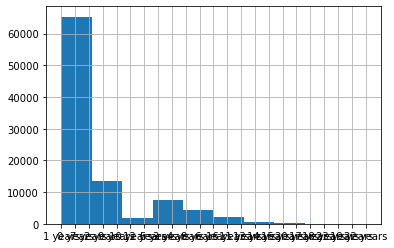

In [9]:
df.outcome_age.hist()

In [10]:
df.outcome_age.describe()

count       95130
unique         23
top       0 years
freq        48890
Name: outcome_age, dtype: object

In [11]:
df.outcome_age.str.replace('years', '').astype(int)

1         1
3         0
4         0
5         7
6         2
         ..
124484    0
124485    1
124486    0
124489    0
124490    0
Name: outcome_age, Length: 95130, dtype: int64

In [12]:
df['outcome_age'] = df.outcome_age.str.replace('years', '').astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal_id     95130 non-null  object
 1   date          95130 non-null  object
 2   animal_type   95130 non-null  object
 3   breed         95130 non-null  object
 4   color         95130 non-null  object
 5   dob           95130 non-null  object
 6   outcome_type  95130 non-null  object
 7   outcome_sex   95130 non-null  object
 8   outcome_age   95130 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 7.3+ MB


In [14]:
df.outcome_age.describe()

count    95130.000000
mean         1.602880
std          2.680892
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         23.000000
Name: outcome_age, dtype: float64

<AxesSubplot:xlabel='outcome_age'>

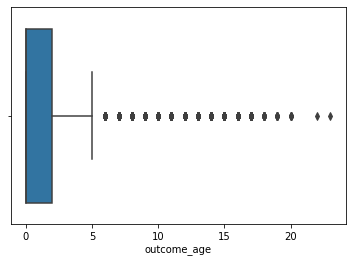

In [16]:
sns.boxplot(x='outcome_age', data=df)

In [33]:
# elderly pets make up 9% of pop
(df.outcome_age > 5).sum() / 95130

0.08721749185325345

In [30]:
((df.outcome_age < 5) & (df.outcome_age > 2)).sum() / 95130

0.07912330495111952

In [34]:
# full grown pets = 24% of pop
((df.outcome_age < 6) & (df.outcome_age > 1)).sum() / 95130

0.24032376747608536

In [28]:
(df.outcome_age < 1).sum() / 95130

0.5139283086302954

In [27]:
# majority of pets are puppies/kitties = 67% 
(df.outcome_age < 2).sum() / 95130

0.6724587406706612

In [35]:
df[(df.outcome_age < 5) & (df.outcome_age > 2)]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age
69,A751447,2017-06-16,Dog,Beagle Mix,Brown/White,06/08/2014,Adoption,Neutered Male,3
76,A809230,2019-11-24,Dog,Siberian Husky,Gray/White,11/21/2015,Adoption,Neutered Male,4
98,A707253,2016-01-29,Dog,Pit Bull Mix,Apricot/Brown,07/10/2012,Transfer,Neutered Male,3
115,A706892,2016-02-24,Dog,German Shepherd Mix,Tan/Black,07/05/2012,Adoption,Spayed Female,3
130,A783891,2019-01-16,Dog,Border Terrier,Black/Tan,11/08/2015,Adoption,Spayed Female,3
...,...,...,...,...,...,...,...,...,...
124422,A829616,2021-03-02,Dog,Labrador Retriever/Golden Retriever,Gold,03/01/2017,Transfer,Neutered Male,4
124423,A812552,2021-03-02,Dog,American Bulldog Mix,White/Brown,10/24/2016,Transfer,Neutered Male,4
124425,A769325,2021-03-02,Dog,Labrador Retriever Mix,Black/White,02/03/2018,Transfer,Neutered Male,3
124470,A822366,2021-03-03,Cat,Domestic Shorthair,Black/White,11/24/2017,Adoption,Spayed Female,3


In [36]:
np.where((df.outcome_age < 6) & (df.outcome_age > 1), 1, 0 )

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
df['full_grown'] = np.where((df.outcome_age < 6) & (df.outcome_age > 1), 1, 0 )

In [38]:
df.head(2).T

,1,3
animal_id,A776359,A720371
date,2018-07-18,2016-02-13
animal_type,Dog,Dog
breed,Chihuahua Shorthair Mix,Anatol Shepherd/Labrador Retriever
color,White/Brown,Buff
dob,07/12/2017,10/08/2015
outcome_type,Adoption,Adoption
outcome_sex,Neutered Male,Neutered Male
outcome_age,1,0
full_grown,0,0


In [39]:
df['elderly'] = np.where(df.outcome_age > 5, 1, 0 )

In [40]:
df['youngins'] = np.where(df.outcome_age < 2, 1, 0 )

In [41]:
df.head(2).T

,1,3
animal_id,A776359,A720371
date,2018-07-18,2016-02-13
animal_type,Dog,Dog
breed,Chihuahua Shorthair Mix,Anatol Shepherd/Labrador Retriever
color,White/Brown,Buff
dob,07/12/2017,10/08/2015
outcome_type,Adoption,Adoption
outcome_sex,Neutered Male,Neutered Male
outcome_age,1,0
full_grown,0,0


In [42]:
df.outcome_sex.value_counts()

Neutered Male    34522
Spayed Female    32594
Intact Female    12389
Intact Male      11408
Unknown           4217
Name: outcome_sex, dtype: int64

In [43]:
np.where(df.outcome_sex ==  "Neutered Male", 1, 0 )

array([1, 1, 0, ..., 0, 1, 1])

In [46]:
df['neutered_male'] = np.where(df.outcome_sex ==  "Neutered Male", 1, 0 )

In [44]:
np.where(df.outcome_sex ==  "Intact Male", 1, 0 )

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
df['intact_male'] = np.where(df.outcome_sex ==  "Intact Male", 1, 0 )

In [45]:
np.where((df.outcome_sex ==  "Neutered Male") | (df.outcome_sex ==  "Spayed Female"), 1, 0 )

array([1, 1, 0, ..., 1, 1, 1])

In [48]:
df['neutered'] = np.where((df.outcome_sex ==  "Neutered Male") | (df.outcome_sex ==  "Spayed Female"), 1, 0 )

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      95130 non-null  object
 1   date           95130 non-null  object
 2   animal_type    95130 non-null  object
 3   breed          95130 non-null  object
 4   color          95130 non-null  object
 5   dob            95130 non-null  object
 6   outcome_type   95130 non-null  object
 7   outcome_sex    95130 non-null  object
 8   outcome_age    95130 non-null  int64 
 9   full_grown     95130 non-null  int64 
 10  elderly        95130 non-null  int64 
 11  youngins       95130 non-null  int64 
 12  neutered_male  95130 non-null  int64 
 13  intact_male    95130 non-null  int64 
 14  neutered       95130 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 11.6+ MB


In [56]:
dummy_df = pd.get_dummies(df.animal_type, prefix="is", drop_first=True)

In [57]:
dummy_df.head(2)

,is_Dog
1,1
3,1


In [59]:
df[df['breed'].str.contains('Pit')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered
31,A725530,2016-06-09,Dog,Pit Bull Mix,Brown Brindle/White,10/30/2015,Adoption,Neutered Male,0,0,0,1,1,0,1
46,A777234,2019-01-02,Dog,Pit Bull Mix,Blue/White,11/25/2017,Transfer,Neutered Male,1,0,0,1,1,0,1
58,A767796,2019-06-20,Dog,American Pit Bull Terrier Mix,Brown/White,12/06/2017,Transfer,Spayed Female,1,0,0,1,0,0,1
98,A707253,2016-01-29,Dog,Pit Bull Mix,Apricot/Brown,07/10/2012,Transfer,Neutered Male,3,1,0,0,1,0,1
99,A721165,2016-02-26,Dog,Pit Bull Mix,Brown/White,02/22/2015,Adoption,Neutered Male,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124450,A815498,2021-03-02,Dog,Pit Bull,Black/White,03/17/2019,Adoption,Spayed Female,1,0,0,1,0,0,1
124455,A830112,2021-03-02,Dog,Pit Bull,Tan/White,01/18/2021,Euthanasia,Unknown,0,0,0,1,0,0,0
124459,A824323,2020-10-19,Dog,Pit Bull,Fawn/White,09/27/2019,Adoption,Neutered Male,1,0,0,1,1,0,1
124463,A826200,2021-03-02,Dog,Pit Bull/Boxer,Black Brindle/White,04/21/2019,Adoption,Spayed Female,1,0,0,1,0,0,1


In [62]:
df[df['breed'].str.contains('Pit')].breed.value_counts()

Pit Bull Mix                              5529
Pit Bull                                   857
Labrador Retriever/Pit Bull                256
American Pit Bull Terrier Mix              214
Pit Bull/Labrador Retriever                109
                                          ... 
Akita/Pit Bull                               1
Pit Bull/Jack Russell Terrier                1
Pit Bull/St. Bernard Smooth Coat             1
Basset Hound/American Pit Bull Terrier       1
Rat Terrier/Pit Bull                         1
Name: breed, Length: 116, dtype: int64

In [64]:
df[df['breed'].str.contains('American Staffordshire')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered
317,A763291,2017-12-13,Dog,American Staffordshire Terrier Mix,Brown Brindle/White,12/06/2016,Adoption,Spayed Female,1,0,0,1,0,0,1
488,A704276,2015-06-19,Dog,American Staffordshire Terrier Mix,Blue/White,06/03/2013,Transfer,Intact Female,2,1,0,0,0,0,0
643,A734082,2016-11-28,Dog,American Staffordshire Terrier Mix,Red/White,09/01/2015,Adoption,Neutered Male,1,0,0,1,1,0,1
691,A796658,2019-07-13,Dog,American Staffordshire Terrier Mix,Sable/White,06/01/2019,Transfer,Intact Female,0,0,0,1,0,0,0
795,A763292,2018-01-13,Dog,American Staffordshire Terrier Mix,Black/White,12/06/2016,Adoption,Neutered Male,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124036,A824861,2021-02-05,Dog,American Staffordshire Terrier,Black/White,10/22/2018,Adoption,Neutered Male,2,1,0,0,1,0,1
124041,A828866,2021-02-05,Dog,American Staffordshire Terrier/Boxer,Black/Black Brindle,09/27/2020,Adoption,Neutered Male,0,0,0,1,1,0,1
124144,A812418,2021-02-11,Dog,American Staffordshire Terrier,Black/White,01/22/2017,Adoption,Neutered Male,4,1,0,0,1,0,1
124194,A828830,2021-02-13,Dog,American Staffordshire Terrier,Black/White,01/26/2019,Adoption,Neutered Male,2,1,0,0,1,0,1


In [65]:
df[df['breed'].str.contains('Staffordshire')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered
28,A773866,2018-08-23,Dog,Labrador Retriever/Staffordshire,Black/White,06/06/2016,Adoption,Neutered Male,2,1,0,0,1,0,1
103,A651995,2018-07-02,Dog,Staffordshire Mix,Brown/White,10/18/2011,Adoption,Spayed Female,6,0,1,0,0,0,1
179,A731908,2016-09-04,Dog,Staffordshire/Basset Hound,Brown Brindle/White,07/29/2015,Adoption,Neutered Male,1,0,0,1,1,0,1
317,A763291,2017-12-13,Dog,American Staffordshire Terrier Mix,Brown Brindle/White,12/06/2016,Adoption,Spayed Female,1,0,0,1,0,0,1
488,A704276,2015-06-19,Dog,American Staffordshire Terrier Mix,Blue/White,06/03/2013,Transfer,Intact Female,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124041,A828866,2021-02-05,Dog,American Staffordshire Terrier/Boxer,Black/Black Brindle,09/27/2020,Adoption,Neutered Male,0,0,0,1,1,0,1
124144,A812418,2021-02-11,Dog,American Staffordshire Terrier,Black/White,01/22/2017,Adoption,Neutered Male,4,1,0,0,1,0,1
124194,A828830,2021-02-13,Dog,American Staffordshire Terrier,Black/White,01/26/2019,Adoption,Neutered Male,2,1,0,0,1,0,1
124264,A827272,2021-02-23,Dog,Staffordshire Mix,White/Blue,06/17/2020,Adoption,Neutered Male,0,0,0,1,1,0,1


In [66]:
df[df['breed'].str.contains('Pit|American Staffordshire|Staffordshire')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered
28,A773866,2018-08-23,Dog,Labrador Retriever/Staffordshire,Black/White,06/06/2016,Adoption,Neutered Male,2,1,0,0,1,0,1
31,A725530,2016-06-09,Dog,Pit Bull Mix,Brown Brindle/White,10/30/2015,Adoption,Neutered Male,0,0,0,1,1,0,1
46,A777234,2019-01-02,Dog,Pit Bull Mix,Blue/White,11/25/2017,Transfer,Neutered Male,1,0,0,1,1,0,1
58,A767796,2019-06-20,Dog,American Pit Bull Terrier Mix,Brown/White,12/06/2017,Transfer,Spayed Female,1,0,0,1,0,0,1
98,A707253,2016-01-29,Dog,Pit Bull Mix,Apricot/Brown,07/10/2012,Transfer,Neutered Male,3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124455,A830112,2021-03-02,Dog,Pit Bull,Tan/White,01/18/2021,Euthanasia,Unknown,0,0,0,1,0,0,0
124459,A824323,2020-10-19,Dog,Pit Bull,Fawn/White,09/27/2019,Adoption,Neutered Male,1,0,0,1,1,0,1
124463,A826200,2021-03-02,Dog,Pit Bull/Boxer,Black Brindle/White,04/21/2019,Adoption,Spayed Female,1,0,0,1,0,0,1
124473,A829776,2021-03-03,Dog,Pit Bull,Tan,08/22/2020,Adoption,Neutered Male,0,0,0,1,1,0,1


In [67]:
np.where(df['breed'].str.contains('Pit|American Staffordshire|Staffordshire'), 1, 0)

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
df['is_pitbull'] = np.where(df['breed'].str.contains('Pit|American Staffordshire|Staffordshire'), 1, 0)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      95130 non-null  object
 1   date           95130 non-null  object
 2   animal_type    95130 non-null  object
 3   breed          95130 non-null  object
 4   color          95130 non-null  object
 5   dob            95130 non-null  object
 6   outcome_type   95130 non-null  object
 7   outcome_sex    95130 non-null  object
 8   outcome_age    95130 non-null  int64 
 9   full_grown     95130 non-null  int64 
 10  elderly        95130 non-null  int64 
 11  youngins       95130 non-null  int64 
 12  neutered_male  95130 non-null  int64 
 13  intact_male    95130 non-null  int64 
 14  neutered       95130 non-null  int64 
 15  is_pitbull     95130 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 12.3+ MB


In [72]:
df[df['color'].str.contains('Black')]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered,is_pitbull
7,A689724,2014-10-18,Cat,Domestic Shorthair Mix,Black,08/01/2014,Adoption,Neutered Male,0,0,0,1,1,0,1,0
9,A684617,2014-07-27,Cat,Domestic Shorthair Mix,Black,07/26/2012,Transfer,Intact Female,2,1,0,0,0,0,0,0
13,A698049,2015-03-16,Cat,Domestic Medium Hair Mix,Black/White,06/05/2014,Transfer,Spayed Female,0,0,0,1,0,0,1,0
18,A760697,2017-10-26,Dog,Yorkshire Terrier Mix,Brown/Black,10/23/2007,Transfer,Intact Male,10,0,1,0,0,1,0,0
28,A773866,2018-08-23,Dog,Labrador Retriever/Staffordshire,Black/White,06/06/2016,Adoption,Neutered Male,2,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124452,A829882,2021-03-02,Dog,German Shepherd/Siberian Husky,Black/Brown,02/25/2019,Adoption,Neutered Male,2,1,0,0,1,0,1,0
124463,A826200,2021-03-02,Dog,Pit Bull/Boxer,Black Brindle/White,04/21/2019,Adoption,Spayed Female,1,0,0,1,0,0,1,1
124470,A822366,2021-03-03,Cat,Domestic Shorthair,Black/White,11/24/2017,Adoption,Spayed Female,3,1,0,0,0,0,1,0
124472,A829552,2021-03-03,Dog,German Shepherd,Tan/Black,02/13/2020,Adoption,Spayed Female,1,0,0,1,0,0,1,0


In [73]:
df[df.color == "Black"]

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered,is_pitbull
7,A689724,2014-10-18,Cat,Domestic Shorthair Mix,Black,08/01/2014,Adoption,Neutered Male,0,0,0,1,1,0,1,0
9,A684617,2014-07-27,Cat,Domestic Shorthair Mix,Black,07/26/2012,Transfer,Intact Female,2,1,0,0,0,0,0,0
62,A696409,2015-02-09,Cat,Domestic Shorthair Mix,Black,11/19/2014,Adoption,Neutered Male,0,0,0,1,1,0,1,0
64,A795325,2019-05-21,Dog,Labrador Retriever,Black,03/19/2019,Adoption,Spayed Female,0,0,0,1,0,0,1,0
77,A783412,2018-12-16,Cat,Domestic Shorthair Mix,Black,10/30/2008,Adoption,Neutered Male,10,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124350,A825932,2021-02-27,Cat,Domestic Shorthair,Black,09/24/2020,Adoption,Spayed Female,0,0,0,1,0,0,1,0
124369,A829840,2021-02-28,Cat,Domestic Shorthair,Black,02/24/2013,Euthanasia,Intact Male,8,0,1,0,0,1,0,0
124415,A828254,2021-03-02,Cat,Domestic Shorthair,Black,12/16/2020,Adoption,Spayed Female,0,0,0,1,0,0,1,0
124442,A828147,2021-03-02,Cat,Domestic Shorthair,Black,11/24/2020,Adoption,Spayed Female,0,0,0,1,0,0,1,0


In [74]:
np.where(df.color == "Black", 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
df['is_black'] = np.where(df.color == "Black", 1, 0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      95130 non-null  object
 1   date           95130 non-null  object
 2   animal_type    95130 non-null  object
 3   breed          95130 non-null  object
 4   color          95130 non-null  object
 5   dob            95130 non-null  object
 6   outcome_type   95130 non-null  object
 7   outcome_sex    95130 non-null  object
 8   outcome_age    95130 non-null  int64 
 9   full_grown     95130 non-null  int64 
 10  elderly        95130 non-null  int64 
 11  youngins       95130 non-null  int64 
 12  neutered_male  95130 non-null  int64 
 13  intact_male    95130 non-null  int64 
 14  neutered       95130 non-null  int64 
 15  is_pitbull     95130 non-null  int64 
 16  is_black       95130 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 13.1+ MB


In [77]:
df.outcome_type.value_counts()

Adoption      54613
Transfer      35654
Euthanasia     3739
Died            946
Disposal        112
Missing          64
Relocate          2
Name: outcome_type, dtype: int64

In [78]:
np.where(df.outcome_type == "Adoption", 1, 0)

array([1, 1, 0, ..., 1, 1, 1])

In [79]:
df['adopted'] = np.where(df.outcome_type == "Adoption", 1, 0)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95130 entries, 1 to 124490
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      95130 non-null  object
 1   date           95130 non-null  object
 2   animal_type    95130 non-null  object
 3   breed          95130 non-null  object
 4   color          95130 non-null  object
 5   dob            95130 non-null  object
 6   outcome_type   95130 non-null  object
 7   outcome_sex    95130 non-null  object
 8   outcome_age    95130 non-null  int64 
 9   full_grown     95130 non-null  int64 
 10  elderly        95130 non-null  int64 
 11  youngins       95130 non-null  int64 
 12  neutered_male  95130 non-null  int64 
 13  intact_male    95130 non-null  int64 
 14  neutered       95130 non-null  int64 
 15  is_pitbull     95130 non-null  int64 
 16  is_black       95130 non-null  int64 
 17  adopted        95130 non-null  int64 
dtypes: int64(10), object(8)
m

In [83]:
df.animal_id.duplicated().value_counts()

False    87947
True      7183
Name: animal_id, dtype: int64

In [85]:
df[df.animal_id.duplicated()].sort_values(by=['animal_id'])

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered,is_pitbull,is_black,adopted
106950,A282897,2015-07-11,Cat,Domestic Shorthair Mix,Black Smoke/White,10/08/2001,Adoption,Neutered Male,13,0,1,0,1,0,1,0,0,1
51853,A318574,2015-07-31,Cat,Domestic Shorthair,Brown Tabby,04/19/2003,Adoption,Neutered Male,12,0,1,0,1,0,1,0,0,1
88857,A350276,2020-04-09,Cat,Abyssinian Mix,Brown Tabby/Agouti,04/13/2004,Adoption,Spayed Female,16,0,1,0,0,0,1,0,0,1
18553,A378348,2014-01-19,Dog,German Shepherd Mix,Black/Brown,08/07/2004,Adoption,Neutered Male,9,0,1,0,1,0,1,0,0,1
93044,A390222,2013-12-15,Dog,Jack Russell Terrier,White/Tan,05/23/2004,Adoption,Spayed Female,9,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123873,A828668,2021-01-30,Dog,Beagle Mix,Fawn/White,03/20/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,0,0,1
123920,A828746,2021-02-04,Dog,Pit Bull,Fawn/White,01/25/2020,Adoption,Neutered Male,1,0,0,1,1,0,1,1,0,1
124019,A828751,2021-02-04,Dog,Australian Cattle Dog Mix,Blue Tick/Tricolor,05/25/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,0,0,1
124167,A828826,2021-02-12,Dog,Pit Bull,Brown Brindle/White,11/27/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,1,0,1


In [92]:
dups = df[df.animal_id.duplicated()].animal_id.to_list()

In [93]:
df.animal_id.isin(dups)

1         False
3          True
4         False
5          True
6         False
          ...  
124484    False
124485    False
124486    False
124489    False
124490    False
Name: animal_id, Length: 95130, dtype: bool

In [95]:
df[df.animal_id.isin(dups)].sort_values(by=['animal_id'])

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered,is_pitbull,is_black,adopted
106950,A282897,2015-07-11,Cat,Domestic Shorthair Mix,Black Smoke/White,10/08/2001,Adoption,Neutered Male,13,0,1,0,1,0,1,0,0,1
97905,A282897,2013-12-28,Cat,Domestic Shorthair Mix,Black Smoke/White,10/08/2001,Adoption,Neutered Male,12,0,1,0,1,0,1,0,0,1
51853,A318574,2015-07-31,Cat,Domestic Shorthair,Brown Tabby,04/19/2003,Adoption,Neutered Male,12,0,1,0,1,0,1,0,0,1
46982,A318574,2016-05-23,Cat,Domestic Shorthair,Brown Tabby,04/19/2003,Euthanasia,Neutered Male,13,0,1,0,1,0,1,0,0,0
88857,A350276,2020-04-09,Cat,Abyssinian Mix,Brown Tabby/Agouti,04/13/2004,Adoption,Spayed Female,16,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124018,A828751,2021-01-30,Dog,Australian Cattle Dog Mix,Blue Tick/Tricolor,05/25/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,0,0,1
124167,A828826,2021-02-12,Dog,Pit Bull,Brown Brindle/White,11/27/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,1,0,1
124085,A828826,2021-02-01,Dog,Pit Bull,Brown Brindle/White,11/27/2020,Adoption,Neutered Male,0,0,0,1,1,0,1,1,0,1
124030,A828891,2021-02-05,Dog,Siberian Husky/Cardigan Welsh Corgi,Cream,01/28/2019,Adoption,Neutered Male,2,1,0,0,1,0,1,0,0,1


In [96]:
duplicates = df[df.animal_id.isin(dups)].sort_values(by=['animal_id'])

In [97]:
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330 entries, 106950 to 123993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      13330 non-null  object
 1   date           13330 non-null  object
 2   animal_type    13330 non-null  object
 3   breed          13330 non-null  object
 4   color          13330 non-null  object
 5   dob            13330 non-null  object
 6   outcome_type   13330 non-null  object
 7   outcome_sex    13330 non-null  object
 8   outcome_age    13330 non-null  int64 
 9   full_grown     13330 non-null  int64 
 10  elderly        13330 non-null  int64 
 11  youngins       13330 non-null  int64 
 12  neutered_male  13330 non-null  int64 
 13  intact_male    13330 non-null  int64 
 14  neutered       13330 non-null  int64 
 15  is_pitbull     13330 non-null  int64 
 16  is_black       13330 non-null  int64 
 17  adopted        13330 non-null  int64 
dtypes: int64(10), object

In [106]:
df.shape

(95130, 18)

In [105]:
df.sort_values('date').drop_duplicates('animal_id', keep='last')

,animal_id,date,animal_type,breed,color,dob,outcome_type,outcome_sex,outcome_age,full_grown,elderly,youngins,neutered_male,intact_male,neutered,is_pitbull,is_black,adopted
20494,A663201,2013-10-01,Dog,Pit Bull Mix,Brown/White,09/14/2011,Transfer,Neutered Male,2,1,0,0,1,0,1,1,0,0
40279,A661933,2013-10-01,Cat,Domestic Shorthair Mix,Blue Tabby,09/19/2003,Euthanasia,Spayed Female,10,0,1,0,0,0,1,0,0,0
85540,A660634,2013-10-01,Cat,Domestic Shorthair,Blue/White,07/09/2013,Adoption,Spayed Female,0,0,0,1,0,0,1,0,0,1
42193,A664271,2013-10-01,Cat,Domestic Shorthair Mix,Orange Tabby,09/24/2013,Transfer,Intact Female,0,0,0,1,0,0,0,0,0,0
38947,A663546,2013-10-01,Dog,American Bulldog Mix,White/Brown Brindle,09/20/2011,Euthanasia,Neutered Male,2,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124472,A829552,2021-03-03,Dog,German Shepherd,Tan/Black,02/13/2020,Adoption,Spayed Female,1,0,0,1,0,0,1,0,0,1
124470,A822366,2021-03-03,Cat,Domestic Shorthair,Black/White,11/24/2017,Adoption,Spayed Female,3,1,0,0,0,0,1,0,0,1
124469,A829483,2021-03-03,Dog,Labrador Retriever/German Shepherd,Tan/White,02/11/2020,Adoption,Neutered Male,1,0,0,1,1,0,1,0,0,1
124481,A829868,2021-03-03,Dog,Beagle/Labrador Retriever,Tricolor,02/25/2020,Adoption,Neutered Male,1,0,0,1,1,0,1,0,0,1


In [107]:
df = df.sort_values('date').drop_duplicates('animal_id', keep='last')

In [108]:
df.shape

(87947, 18)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87947 entries, 20494 to 124490
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      87947 non-null  object
 1   date           87947 non-null  object
 2   animal_type    87947 non-null  object
 3   breed          87947 non-null  object
 4   color          87947 non-null  object
 5   dob            87947 non-null  object
 6   outcome_type   87947 non-null  object
 7   outcome_sex    87947 non-null  object
 8   outcome_age    87947 non-null  int64 
 9   full_grown     87947 non-null  int64 
 10  elderly        87947 non-null  int64 
 11  youngins       87947 non-null  int64 
 12  neutered_male  87947 non-null  int64 
 13  intact_male    87947 non-null  int64 
 14  neutered       87947 non-null  int64 
 15  is_pitbull     87947 non-null  int64 
 16  is_black       87947 non-null  int64 
 17  adopted        87947 non-null  int64 
dtypes: int64(10), object(

In [110]:
cols = ['animal_type', 'outcome_type', 'outcome_sex', 'outcome_age']

In [111]:
df = df.drop(columns= cols)

In [112]:
df.shape

(87947, 14)

In [113]:
df.isnull().sum()

animal_id        0
date             0
breed            0
color            0
dob              0
full_grown       0
elderly          0
youngins         0
neutered_male    0
intact_male      0
neutered         0
is_pitbull       0
is_black         0
adopted          0
dtype: int64

In [ ]:
dummy_df = pd.get_dummies(df[[]])

### LAST test of functions


In [2]:
df = w.get_aac()

In [3]:
df = w.clean_aac(df)

In [4]:
df.shape

(87947, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87947 entries, 20494 to 124490
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      87947 non-null  object
 1   date           87947 non-null  object
 2   breed          87947 non-null  object
 3   color          87947 non-null  object
 4   dob            87947 non-null  object
 5   elderly        87947 non-null  int64 
 6   full_grown     87947 non-null  int64 
 7   youngins       87947 non-null  int64 
 8   neutered_male  87947 non-null  int64 
 9   intact_male    87947 non-null  int64 
 10  neutered       87947 non-null  int64 
 11  is_pitbull     87947 non-null  int64 
 12  is_black       87947 non-null  int64 
 13  adopted        87947 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 10.1+ MB


In [6]:
df.isnull().sum()

animal_id        0
date             0
breed            0
color            0
dob              0
elderly          0
full_grown       0
youngins         0
neutered_male    0
intact_male      0
neutered         0
is_pitbull       0
is_black         0
adopted          0
dtype: int64